<a href="https://colab.research.google.com/github/sameermdanwer/python-assignment-/blob/main/Statistics_Advance_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Estimation Statistics is a branch of statistics that deals with estimating population parameters based on sample data. It allows researchers to make inferences about a population without having to collect data from every individual in that population. The two main types of estimation in statistics are point estimation and interval estimation.

1. Point Estimate
A point estimate is a single value that serves as an estimate of a population parameter. It is derived from sample data and provides a specific value that is considered to be the best guess for the parameter being estimated. For example:

* If you want to estimate the average height of adults in a city, you might take a sample of 100 individuals and calculate their average height. The calculated average (e.g., 170 cm) is your point estimate for the population mean height.
Point estimates are convenient but have limitations; they do not provide information about the variability or uncertainty associated with the estimate.

2. Interval Estimate
An interval estimate, on the other hand, provides a range of values within which the population parameter is expected to lie, along with a specified level of confidence. This method accounts for sampling variability and provides a more comprehensive understanding of the parameter's potential values. For example:

* Using the same example of estimating average height, instead of just providing a single value, you might calculate a confidence interval (e.g., 168 cm to 172 cm) with 95% confidence. This means you can be 95% confident that the true population mean height falls within that range.
Interval estimates are generally more informative than point estimates because they give insight into the precision of the estimate and the uncertainty involved.

# Q2. Write a Python function to estimate the population mean using a sample mean and standard
deviation.

To estimate the population mean using a sample mean and standard deviation, you can use the formula for the confidence interval. The most commonly used confidence interval for the population mean when the sample size is relatively small (typically
𝑛
<
30
n<30) or the population standard deviation is unknown is given by:

Confidence Interval
=
𝑥
ˉ
±
𝑡
⋅
(
𝑠
𝑛
)
Confidence Interval=
x
ˉ
 ±t⋅(
n
​

s
​
 )

 code

In [ ]:
import numpy as np
import scipy.stats as stats

def estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level=0.95):
    """
    Estimate the population mean using sample mean and standard deviation.

    Parameters:
    - sample_mean (float): The mean of the sample.
    - sample_std (float): The standard deviation of the sample.
    - sample_size (int): The size of the sample.
    - confidence_level (float): The confidence level for the estimate (default is 0.95).

    Returns:
    - tuple: A tuple containing the lower and upper bounds of the confidence interval.
    """

    # Calculate the standard error
    standard_error = sample_std / np.sqrt(sample_size)

    # Get the t-score for the given confidence level and degrees of freedom
    t_score = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

    # Calculate the margin of error
    margin_of_error = t_score * standard_error

    # Calculate the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

# Example usage:
sample_mean = 100
sample_std = 15
sample_size = 25
confidence_level = 0.95

confidence_interval = estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level)
print(f"Estimated population mean confidence interval: {confidence_interval}")

# Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

Hypothesis Testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It involves formulating a hypothesis (a statement or assumption) and then using statistical analysis to determine whether to accept or reject that hypothesis based on the evidence provided by the sample.

# Why Hypothesis Testing is Used
* Decision Making: Hypothesis testing helps researchers make informed decisions based on data. It provides a systematic way to evaluate evidence against a specific claim.

* Scientific Research: In scientific studies, hypothesis testing is used to validate or refute theories and assumptions, guiding researchers toward new discoveries and insights.

* Quality Control: In manufacturing and production, hypothesis testing is often used to determine whether a process meets quality standards or if there are deviations that require correction.

# Importance of Hypothesis Testing
1. Objectivity: Hypothesis testing provides a structured framework for evaluating claims, reducing subjectivity in decision-making.

2. Quantifying Uncertainty: It allows researchers to quantify the uncertainty associated with conclusions drawn from sample data, which is crucial in many fields, including medicine, psychology, and economics.

3. Guiding Research: It helps in guiding further research by identifying whether there is sufficient evidence to support or refute a particular hypothesis, thus informing future studies.

4. Error Control: Hypothesis testing allows researchers to control for Type I errors (rejecting a true null hypothesis) and Type II errors (failing to reject a false null hypothesis), which is vital for maintaining the integrity of statistical conclusions.

5. Standardization: It provides a standardized approach for testing theories and hypotheses, making it easier to compare results across different studies and fields.

# Q4. Create a hypothesis that states whether the average weight of male college students is greater than
the average weight of female college students.

To create a hypothesis regarding the average weight of male college students compared to female college students, we can formulate the null hypothesis and the alternative hypothesis as follows:

# Hypotheses
1. Null Hypothesis (
𝐻
0
H
0
​
 ): There is no difference in the average weights of male and female college students. This can be stated mathematically as:

𝐻
0
:
 𝜇
𝑀
≤
𝜇
𝐹
H
0
​
 :μ
M
​
 ≤μ
F
​

Where:

𝜇
𝑀
* μ
M
​
  = average weight of male college students
𝜇
𝐹
* μ
F
​
  = average weight of female college students
2. Alternative Hypothesis (
𝐻
1
H
1
​
 ): The average weight of male college students is greater than the average weight of female college students. This can be stated mathematically as:

𝐻
1
:
𝜇
𝑀
>
𝜇
𝐹
H
1
​
 :μ
M
​
 >μ
F
​

# Explanation
* The null hypothesis (
𝐻
0
H
0
​
 ) suggests that there is no significant difference or that the average weight of male students is less than or equal to that of female students.
* The alternative hypothesis (
𝐻
1
H
1
​
 ) posits that the average weight of male students is greater than that of female students, which is what we are trying to support through hypothesis testing.
# Testing the Hypothesis
To test this hypothesis, you would typically collect data on the weights of a sample of male and female college students, calculate the sample means and standard deviations, and then perform an appropriate statistical test (e.g., a t-test) to determine whether there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.









# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means,
given a sample from each population.

To conduct a hypothesis test on the difference between two population means based on samples from each population, you can use a two-sample t-test. This test compares the means of two independent samples to determine if there is enough evidence to reject the null hypothesis.

Below is a Python script that uses the scipy.stats library to perform a two-sample t-test. The script assumes that the variances of the two populations are equal.

In [ ]:
import numpy as np
import scipy.stats as stats

def hypothesis_test_two_sample(sample1, sample2, alpha=0.05):
    """
    Conduct a hypothesis test for the difference between two population means.

    Parameters:
    - sample1 (array-like): Sample data from population 1.
    - sample2 (array-like): Sample data from population 2.
    - alpha (float): Significance level for the test (default is 0.05).

    Returns:
    - dict: A dictionary containing the test statistic, p-value, and conclusion.
    """
    # Calculate sample means and standard deviations
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)  # Sample standard deviation
    std2 = np.std(sample2, ddof=1)  # Sample standard deviation

    # Calculate sample sizes
    n1 = len(sample1)
    n2 = len(sample2)

    # Calculate the t-statistic and degrees of freedom
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
    df = n1 + n2 - 2  # degrees of freedom

    # Calculate the p-value (two-tailed test)
    p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # Two-tailed test

    # Conclusion
    if p_value < alpha:
        conclusion = "Reject the null hypothesis: there is a significant difference between the population means."
    else:
        conclusion = "Fail to reject the null hypothesis: no significant difference between the population means."

    return {
        "t_statistic": t_statistic,
        "p_value": p_value,
        "conclusion": conclusion,
        "mean1": mean1,
        "mean2": mean2,
        "std1": std1,
        "std2": std2
    }

# Example usage:
sample1 = [68, 70, 75, 80, 82]  # Sample from population 1 (e.g., male students' weights)
sample2 = [62, 65, 63, 67, 70]  # Sample from population 2 (e.g., female students' weights)

result = hypothesis_test_two_sample(sample1, sample2, alpha=0.05)

# Print the results
print("Sample 1 Mean:", result["mean1"])
print("Sample 2 Mean:", result["mean2"])
print("Sample 1 Standard Deviation:", result["std1"])
print("Sample 2 Standard Deviation:", result["std2"])
print("T-statistic:", result["t_statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])

# Q6: What is a null and alternative hypothesis? Give some examples.

# Null Hypothesis (
𝐻
0
H
0
​
 )
The null hypothesis is a statement that indicates no effect, no difference, or no relationship between variables in a statistical hypothesis test. It serves as a default or baseline assumption that any observed effect in the data is due to chance. Researchers seek evidence to reject the null hypothesis in favor of an alternative hypothesis.

# Alternative Hypothesis (
𝐻
1
H
1
​
  or
𝐻
𝑎
H
a
​
 )
The alternative hypothesis is a statement that indicates the presence of an effect, a difference, or a relationship between variables. It represents what the researcher aims to support through statistical testing. The alternative hypothesis is what is concluded if the null hypothesis is rejected.

# Examples of Null and Alternative Hypotheses
1. Example 1: Mean Comparison

* Scenario: Testing whether a new teaching method is more effective than the traditional method in improving students' test scores.
* Null Hypothesis (
𝐻
0
H
0
​
 ): The mean test scores of students taught with the new method are equal to the mean test scores of students taught with the traditional method.
𝐻
0
:
𝜇
𝑛
𝑒
𝑤
=
𝜇
𝑡
𝑟
𝑎
𝑑
𝑖
𝑡
𝑖
𝑜
𝑛
𝑎
𝑙
H
0
​
 :μ
new
​
 =μ
traditional
​

* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The mean test scores of students taught with the new method are greater than those of students taught with the traditional method.
𝐻
1
:
𝜇
𝑛
𝑒
𝑤
>
𝜇
𝑡
𝑟
𝑎
𝑑
𝑖
𝑡
𝑖
𝑜
𝑛
𝑎
𝑙
H
1
​
 :μ
new
​
 >μ
traditional
​

2. Example 2: Proportions Comparison

* Scenario: Testing whether the proportion of voters favoring a new policy differs by gender.
* Null Hypothesis (
𝐻
0
H
0
​
 ): The proportion of male voters favoring the policy is equal to the proportion of female voters favoring the policy.
𝐻
0
:
𝑝
𝑚
𝑎
𝑙
𝑒
=
𝑝
𝑓
𝑒
𝑚
𝑎
𝑙
𝑒
H
0
​
 :p
male
​
 =p
female
​

* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The proportion of male voters favoring the policy is not equal to the proportion of female voters favoring the policy.
𝐻
1
:
𝑝
𝑚
𝑎
𝑙
𝑒
≠
𝑝
𝑓
𝑒
𝑚
𝑎
𝑙
𝑒
H
1
​
 :p
male
​


=p
female
​

3. Example 3: Drug Effectiveness

* Scenario: Testing whether a new drug reduces blood pressure more effectively than a placebo.
* Null Hypothesis (
𝐻
0
H
0
​
 ): The mean reduction in blood pressure for patients taking the new drug is equal to the mean reduction for patients taking the placebo.
𝐻
0
:
𝜇
𝑑
𝑟
𝑢
𝑔
=
𝜇
𝑝
𝑙
𝑎
𝑐
𝑒
𝑏
𝑜
H
0
​
 :μ
drug
​
 =μ
placebo
​

* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The mean reduction in blood pressure for patients taking the new drug is greater than the mean reduction for patients taking the placebo.
𝐻
1
:
𝜇
𝑑
𝑟
𝑢
𝑔
>
𝜇
𝑝
𝑙
𝑎
𝑐
𝑒
𝑏
𝑜
H
1
​
 :μ
drug
​
 >μ
placebo
​

4. Example 4: Correlation

* Scenario: Testing whether there is a correlation between hours studied and exam scores.
* Null Hypothesis (
𝐻
0
H
0
​
 ): There is no correlation between hours studied and exam scores.
𝐻
0
:
𝜌
=
0
H
0
​
 :ρ=0
* Alternative Hypothesis (
𝐻
1
H
1
​
 ): There is a positive correlation between hours studied and exam scores.
𝐻
1
:
𝜌
>
0
H
1
​
 :ρ>0

# Q7: Write down the steps involved in hypothesis testing.

Hypothesis testing is a systematic process used to determine whether there is enough statistical evidence to support a specific hypothesis about a population. Here are the key steps involved in hypothesis testing:

# Steps in Hypothesis Testing
1. State the Hypotheses:

* Formulate the null hypothesis (
𝐻
0
H
0
​
 ), which represents the status quo or no effect.
* Formulate the alternative hypothesis (
𝐻
1
H
1
​
  or
𝐻
𝑎
H
a
​
 ), which represents the claim or effect you wish to test.
Example:

𝐻
0
:
𝜇
=
𝜇
0
H
0
​
 :μ=μ
0
​
  (the population mean is equal to a specific value)
𝐻
1
:
𝜇
≠
𝜇
0
H
1
​
 :μ

=μ
0
​
  (the population mean is not equal to that value)
2. Choose the Significance Level (
𝛼
α):

* Select a significance level, typically
0.05
0.05 or
0.01
0.01, which determines the threshold for rejecting the null hypothesis. The significance level represents the probability of making a Type I error (rejecting a true null hypothesis).
3. Select the Appropriate Test:

* Choose a statistical test based on the type of data and the hypotheses being tested (e.g., t-test, z-test, chi-square test).
4. Collect Data:

* Gather sample data relevant to the hypotheses. Ensure the data is collected in a manner that avoids bias and represents the population of interest.
5. Calculate the Test Statistic:

* Use the collected data to compute the test statistic, which quantifies how far the sample statistic is from the null hypothesis value, standardized by the variability in the sample.
Example for a t-test:

𝑡
=
𝑥
ˉ
−
𝜇
0
𝑠
/
𝑛
t=
s/
n
​

x
ˉ
 −μ
0
​

​

Where
𝑥
ˉ
x
ˉ
  is the sample mean,
𝜇
0
μ
0
​
  is the null hypothesis mean,
𝑠
s is the sample standard deviation, and
𝑛
n is the sample size.

6. Determine the P-value:

* Calculate the p-value, which is the probability of obtaining the observed results (or more extreme) under the assumption that the null hypothesis is true.
7. Make a Decision:

* Compare the p-value to the significance level (
𝛼
α):
If
𝑝
≤
𝛼
p≤α: Reject the null hypothesis (
𝐻
0
H
0
​
 ).
If
𝑝
>
𝛼
p>α: Fail to reject the null hypothesis (
𝐻
0
H
0
​
 ).
8. Draw a Conclusion:

* Interpret the results in the context of the research question. Summarize whether there is sufficient evidence to support the alternative hypothesis and discuss the implications of the findings.
9. Report the Results:

* Present the findings clearly, including the hypotheses, test statistics, p-values, confidence intervals (if applicable), and conclusions. Provide context regarding the practical significance of the results.

# Q8. Define p-value and explain its significance in hypothesis testing.

# Definition of P-value
The p-value (probability value) is a statistical metric that measures the strength of the evidence against the null hypothesis (
𝐻
0
H
0
​
 ) in hypothesis testing. It represents the probability of obtaining a test statistic as extreme as, or more extreme than, the one actually observed, assuming that the null hypothesis is true.

Mathematically, the p-value is defined as:

𝑝
-value
=
𝑃
(
Test Statistic
≥
Observed Value
∣
𝐻
0
 is true
)
p-value=P(Test Statistic≥Observed Value∣H
0
​
  is true)
# Significance of P-value in Hypothesis Testing
1. Decision-Making Tool:

* The p-value helps researchers decide whether to reject or fail to reject the null hypothesis. It quantifies how likely it is to observe the sample data under the assumption that the null hypothesis is true.
* A smaller p-value indicates stronger evidence against the null hypothesis.
2. Comparison with Significance Level (
𝛼
α):

* Researchers typically set a significance level (commonly
0.05
0.05 or
0.01
0.01) prior to conducting the test. The p-value is then compared to this threshold:
* If
𝑝
≤
𝛼
p≤α: Reject the null hypothesis, indicating that the observed effect is statistically significant.
* If
𝑝
>
𝛼
p>α: Fail to reject the null hypothesis, indicating insufficient evidence to conclude a significant effect.
Interpretation of P-values:

* Small P-value (e.g.,
𝑝
<
0.05
p<0.05): Suggests strong evidence against the null hypothesis. This means that the observed result is unlikely to have occurred by random chance alone, leading to a conclusion that there may be a significant effect or difference.
* Large P-value (e.g.,
𝑝
>
0.05
p>0.05): Indicates weak evidence against the null hypothesis, suggesting that any observed effect could plausibly be due to random sampling variability. Thus, researchers do not reject the null hypothesis.
4. Not a Measure of Effect Size:

* It is important to note that the p-value does not measure the size or importance of an effect; it only indicates the strength of evidence against the null hypothesis. A very small p-value could correspond to a trivial effect if the sample size is large enough.
5. Context-Dependent:

* The significance of a p-value can vary depending on the context of the study, the field of research, and the specific hypotheses being tested. A p-value that is considered significant in one context might not be significant in another.

# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom
parameter set to 10.

To generate a plot of the Student's t-distribution with degrees of freedom set to 10 using Python's matplotlib and scipy.stats, you can use the following code:

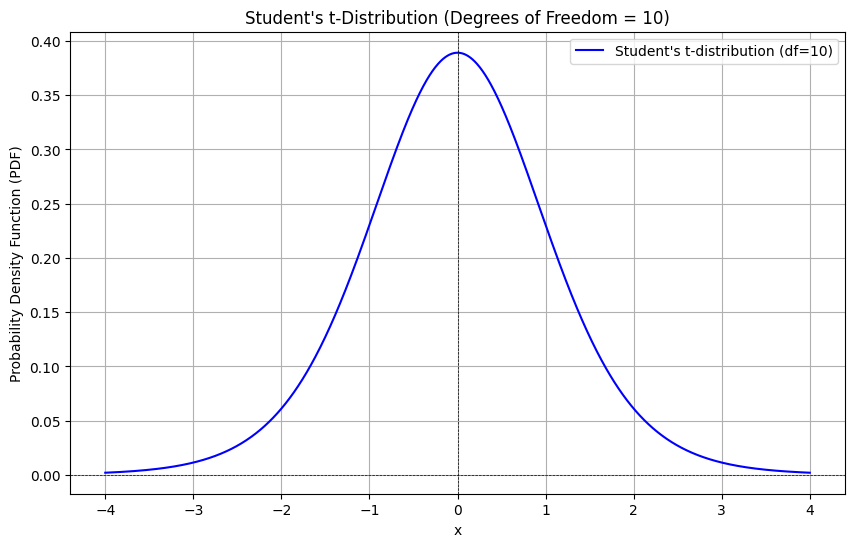

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Set degrees of freedom
df = 10

# Generate x values from -4 to 4
x = np.linspace(-4, 4, 1000)

# Calculate the t-distribution values for these x values
y = t.pdf(x, df)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f"Student's t-distribution (df={df})", color='blue')

# Add titles and labels
plt.title("Student's t-Distribution (Degrees of Freedom = 10)")
plt.xlabel("x")
plt.ylabel("Probability Density Function (PDF)")
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two
random samples of equal size and a null hypothesis that the population means are equal.

To calculate the two-sample t-test for independent samples in Python, you can use the scipy.stats library, which provides a convenient function for this purpose. Below is a complete Python program that generates two random samples of equal size, performs the two-sample t-test, and prints the results.

In [2]:
import numpy as np
import scipy.stats as stats

def two_sample_t_test(sample1, sample2):
    """
    Perform a two-sample t-test for independent samples.

    Parameters:
    - sample1 (array-like): First sample data.
    - sample2 (array-like): Second sample data.

    Returns:
    - dict: A dictionary containing the t-statistic, p-value, and conclusion.
    """
    # Perform the two-sample t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)

    # Conclusion based on p-value
    alpha = 0.05  # Significance level
    if p_value < alpha:
        conclusion = "Reject the null hypothesis: There is a significant difference between the population means."
    else:
        conclusion = "Fail to reject the null hypothesis: No significant difference between the population means."

    return {
        "t_statistic": t_statistic,
        "p_value": p_value,
        "conclusion": conclusion
    }

# Generate two random samples of equal size
np.random.seed(0)  # For reproducibility
sample_size = 30
sample1 = np.random.normal(loc=100, scale=10, size=sample_size)  # Sample 1 with mean=100, std=10
sample2 = np.random.normal(loc=105, scale=10, size=sample_size)  # Sample 2 with mean=105, std=10

# Perform the two-sample t-test
result = two_sample_t_test(sample1, sample2)

# Print the results
print("Sample 1 Mean:", np.mean(sample1))
print("Sample 2 Mean:", np.mean(sample2))
print("T-statistic:", result["t_statistic"])
print("P-value:", result["p_value"])
print("Conclusion:", result["conclusion"])


Sample 1 Mean: 104.42856447263173
Sample 2 Mean: 102.10478143846018
T-statistic: 0.889701920750515
P-value: 0.37730145339434773
Conclusion: Fail to reject the null hypothesis: No significant difference between the population means.


# Q11: What is Student’s t distribution? When to use the t-Distribution.

# What is Student’s t-Distribution?
Student's t-distribution, often simply called the t-distribution, is a probability distribution that is used in statistics for estimating population parameters when the sample size is small and the population standard deviation is unknown. It was first described by William Sealy Gosset under the pseudonym "Student" in the early 20th century.

The t-distribution has the following characteristics:

1. Shape: The t-distribution is symmetric and bell-shaped, similar to the normal distribution, but it has heavier tails. This means that it is more prone to producing values that fall far from its mean compared to the normal distribution.

2. Degrees of Freedom (df): The shape of the t-distribution is determined by the degrees of freedom, which is typically related to the sample size. As the degrees of freedom increase (e.g., as sample size increases), the t-distribution approaches the normal distribution. For a t-distribution, degrees of freedom are usually calculated as
𝑛
−
1
n−1, where
𝑛
n is the sample size.

3. Use with Small Samples: The t-distribution is particularly useful when working with small sample sizes (typically
𝑛
<
30
n<30). It accounts for the additional uncertainty associated with estimating the population standard deviation from a small sample.

# When to Use the t-Distribution
1. Small Sample Sizes: Use the t-distribution when the sample size is small (usually
𝑛
<
30
n<30) and the population standard deviation is unknown. This is a common scenario in many practical situations, such as pilot studies or preliminary research.

2. Unknown Population Standard Deviation: When the population standard deviation (
𝜎
σ) is unknown and must be estimated from the sample standard deviation (
𝑠
s), the t-distribution is appropriate. The formula for the t-statistic is:

𝑡
=
𝑥
ˉ
−
𝜇
0
𝑠
/
𝑛
t=
s/
n
​

x
ˉ
 −μ
0
​

​

where
𝑥
ˉ
x
ˉ
  is the sample mean,
𝜇
0
μ
0
​
  is the hypothesized population mean,
𝑠
s is the sample standard deviation, and
𝑛
n is the sample size.

3. Hypothesis Testing: The t-distribution is commonly used in hypothesis testing, particularly for t-tests (one-sample, two-sample, and paired t-tests) when comparing means.

4. Confidence Intervals: When constructing confidence intervals for the mean of a normally distributed population with unknown variance, the t-distribution is used to determine the critical values.

5. Linear Regression: In linear regression analysis, t-tests are used to determine the significance of individual predictors, especially when sample sizes are small.

#Q12: What is t-statistic? State the formula for t-statistic.

# What is the T-statistic?
The t-statistic is a value that results from performing a t-test, which is a statistical test used to determine if there is a significant difference between the means of two groups or between a sample mean and a known value (population mean). The t-statistic measures how many standard deviations the sample mean is away from the population mean under the null hypothesis.

The t-statistic is particularly useful when dealing with small sample sizes (typically
𝑛
<
30
n<30) and when the population standard deviation is unknown. It follows a Student's t-distribution, which accounts for the additional variability inherent in estimating population parameters from small samples.

# Formula for T-statistic
The formula for calculating the t-statistic varies depending on the type of t-test being performed. Below are the formulas for different scenarios:

1. One-Sample T-Test: When comparing the sample mean to a known population mean:

𝑡
=
𝑥
ˉ
−
𝜇
0
𝑠
/
𝑛
t=
s/
n
​

x
ˉ
 −μ
0
​

​
2. Two-Sample T-Test (Independent Samples): When comparing the means of two independent samples:

𝑡
=
𝑥
ˉ
1
−
𝑥
ˉ
2
𝑠
𝑝
2
(
1
𝑛
1
+
1
𝑛
2
)
t=
s
p
2
​
 (
n
1
​

1
​
 +
n
2
​

1
​
 )
​

x
ˉ
  
1
​
 −
x
ˉ
  
2
​

​
3. Paired T-Test: When comparing means from the same group at different times (e.g., before and after treatment):

𝑡
=
𝑑
ˉ
𝑠
𝑑
/
𝑛
t=
s
d
​
 /
n
​

d
ˉ

​





# Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50.
Estimate the population mean revenue with a 95% confidence interval.

To estimate the population mean revenue with a 95% confidence interval using the sample data provided, you can use the following formula for the confidence interval:

Confidence Interval
=
𝑥
ˉ
±
𝑡
∗
⋅
𝑠
𝑛
Confidence Interval=
x
ˉ
 ±t
∗
 ⋅
n
​

s
​

Where:

𝑥
ˉ
x
ˉ
  = Sample mean
𝑡
∗
t
∗
  = Critical t-value for the desired confidence level (based on degrees of freedom)
𝑠
s = Sample standard deviation
𝑛
n = Sample size
# Given Data:
* Sample size (
𝑛
n) = 50
* Sample mean (
𝑥
ˉ
x
ˉ
 ) = $500
* Sample standard deviation (
𝑠
s) = $50
* Confidence level = 95%
# Steps to Calculate the Confidence Interval:
1. Determine the Degrees of Freedom:

Degrees of Freedom
=
𝑛
−
1
=
50
−
1
=
49
Degrees of Freedom=n−1=50−1=49
2. Find the Critical t-value (
𝑡
∗
t
∗
 ): For a 95% confidence interval and 49 degrees of freedom, we can use the scipy.stats library to find the critical t-value.

3. Calculate the Standard Error (SE):

SE
=
𝑠
𝑛
=
50
50
≈
7.07
SE=
n
​

s
​
 =
50
​

50
​
 ≈7.07
4. Calculate the Margin of Error:

Margin of Error
=
𝑡
∗
⋅
SE
Margin of Error=t
∗
 ⋅SE
5. Construct the Confidence Interval:

Confidence Interval
=
𝑥
ˉ
±
Margin of Error
Confidence Interval=
x
ˉ
 ±Margin of Error

In [3]:
import numpy as np
import scipy.stats as stats

# Given data
n = 50
sample_mean = 500
sample_std = 50
confidence_level = 0.95

# Calculate degrees of freedom
df = n - 1

# Find the critical t-value for 95% confidence
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate standard error
standard_error = sample_std / np.sqrt(n)

# Calculate margin of error
margin_of_error = t_critical * standard_error

# Calculate confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print(f"95% Confidence Interval for the population mean revenue: {confidence_interval}")


95% Confidence Interval for the population mean revenue: (485.79015722521353, 514.2098427747865)


# Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.
ChatGPT said:
ChatGPT
To test the hypothesis that a new drug will decrease blood pressure by 10 mmHg, we can perform a one-sample t-test. Here are the steps to conduct the hypothesis test:

# Step 1: State the Hypotheses
* Null Hypothesis (
𝐻
0
H
0
​
 ): The drug decreases blood pressure by 10 mmHg.
𝐻
0
:
𝜇
=
10
H
0
​
 :μ=10
* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The drug does not decrease blood pressure by 10 mmHg (it may decrease it less than 10 mmHg).
𝐻
1
:
𝜇
<
10
H
1
​
 :μ<10
# Step 2: Given Data
* Sample size (
𝑛
n) = 100
* Sample mean (
𝑥
ˉ
x
ˉ
 ) = 8 mmHg
* Population mean under the null hypothesis (
𝜇
0
μ
0
​
 ) = 10 mmHg
* Sample standard deviation (
𝑠
s) = 3 mmHg
* Significance level (
𝛼
α) = 0.05
# Step 3: Calculate the T-statistic
The t-statistic is calculated using the formula:

𝑡
=
𝑥
ˉ
−
𝜇
0
𝑠
/
𝑛
t=
s/
n
​

x
ˉ
 −μ
0
​

​

# Step 4: Determine the Critical Value
Since this is a one-tailed test, we need to find the critical t-value for
𝑛
−
1
n−1 degrees of freedom at a significance level of 0.05.

# Step 5: Decision Rule
* If the calculated t-statistic is less than the negative critical t-value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

In [4]:
import numpy as np
import scipy.stats as stats

# Given data
n = 100
sample_mean = 8  # Sample mean decrease
mu_0 = 10        # Population mean under null hypothesis
sample_std = 3   # Sample standard deviation
alpha = 0.05     # Significance level

# Calculate the t-statistic
t_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Determine degrees of freedom
df = n - 1

# Critical t-value for one-tailed test
t_critical = stats.t.ppf(1 - alpha, df)

# Print results
print(f"T-statistic: {t_statistic:.4f}")
print(f"Critical t-value: {t_critical:.4f}")

# Decision
if t_statistic < -t_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


T-statistic: -6.6667
Critical t-value: 1.6604
Reject the null hypothesis.


# Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5
pounds with a significance level of 0.01.

To test the hypothesis that the true mean weight of the products is less than 5 pounds, we will perform a one-sample t-test. Here’s how to conduct the hypothesis test step-by-step:

# Step 1: State the Hypotheses
* Null Hypothesis (
𝐻
0
H
0
​
 ): The true mean weight of the products is 5 pounds.

𝐻
0
:
𝜇
=
5
H
0
​
 :μ=5
* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The true mean weight of the products is less than 5 pounds.

𝐻
1
:
𝜇
<
5
H
1
​
 :μ<5
# Step 2: Given Data
* Population mean (
𝜇
0
μ
0
​
 ) = 5 pounds
* Sample size (
𝑛
n) = 25
* Sample mean (
𝑥
ˉ
x
ˉ
 ) = 4.8 pounds
* Population standard deviation (
𝜎
σ) = 0.5 pounds (assuming we can use this for a z-test because of the sample size)
* Significance level (
𝛼
α) = 0.01
# Step 3: Calculate the Z-statistic
Since the sample size is large (
𝑛
≥
30
n≥30), we can use the z-test formula. The z-statistic is calculated using the formula:

𝑧
=
𝑥
ˉ
−
𝜇
0
𝜎
/
𝑛
z=
σ/
n
​

x
ˉ
 −μ
0
​

​

# Step 4: Determine the Critical Value
For a one-tailed test at a significance level of 0.01, we need to find the critical z-value.

# Step 5: Decision Rule
* If the calculated z-statistic is less than the negative critical z-value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

In [5]:
import numpy as np
import scipy.stats as stats

# Given data
n = 25
sample_mean = 4.8  # Sample mean weight
mu_0 = 5           # Population mean under null hypothesis
population_std = 0.5  # Population standard deviation
alpha = 0.01       # Significance level

# Calculate the z-statistic
z_statistic = (sample_mean - mu_0) / (population_std / np.sqrt(n))

# Critical z-value for one-tailed test
z_critical = stats.norm.ppf(1 - alpha)

# Print results
print(f"Z-statistic: {z_statistic:.4f}")
print(f"Critical z-value: {z_critical:.4f}")

# Decision
if z_statistic < -z_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Z-statistic: -2.0000
Critical z-value: 2.3263
Fail to reject the null hypothesis.


# Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 =
30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean
score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two
groups are equal with a significance level of 0.01.

To test the hypothesis that the population means for the two groups of students are equal, we will conduct a two-sample t-test. Here are the steps to perform the hypothesis test:

# Step 1: State the Hypotheses
* Null Hypothesis (
𝐻
0
H
0
​
 ): The population means for the two groups are equal.

𝐻
0
:
𝜇
1
=
𝜇
2
H
0
​
 :μ
1
​
 =μ
2
​

* Alternative Hypothesis (
𝐻
1
H
1
​
 ): The population means for the two groups are not equal.

𝐻
1
:
𝜇
1
≠
𝜇
2
H
1
​
 :μ
1
​


=μ
2
​

# Step 2: Given Data
* Group 1:

* Sample size (
𝑛
1
n
1
​
 ) = 30
* Sample mean (
𝑥
ˉ
1
x
ˉ
  
1
​
 ) = 80
* Sample standard deviation (
𝑠
1
s
1
​
 ) = 10
* Group 2:

* Sample size (
𝑛
2
n
2
​
 ) = 40
* Sample mean (
𝑥
ˉ
2
x
ˉ
  
2
​
 ) = 75
* Sample standard deviation (
𝑠
2
s
2
​
 ) = 8
* Significance level (
𝛼
α) = 0.01

# Step 3: Calculate the T-statistic
The formula for the t-statistic for two independent samples is:

𝑡
=
𝑥
ˉ
1
−
𝑥
ˉ
2
𝑠
1
2
𝑛
1
+
𝑠
2
2
𝑛
2
t=
n
1
​

s
1
2
​

​
 +
n
2
​

s
2
2
​

​

​

x
ˉ
  
1
​
 −
x
ˉ
  
2
​

​

# Step 4: Determine the Critical Value
Since this is a two-tailed test, we need to find the critical t-value for
𝑛
1
+
𝑛
2
−
2
n
1
​
 +n
2
​
 −2 degrees of freedom at a significance level of 0.01.

# Step 5: Decision Rule
If the absolute value of the calculated t-statistic is greater than the critical t-value, we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.


In [6]:
import numpy as np
import scipy.stats as stats

# Given data
n1 = 30
mean1 = 80
std1 = 10

n2 = 40
mean2 = 75
std2 = 8

alpha = 0.01  # Significance level

# Calculate the t-statistic
t_statistic = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate degrees of freedom
df = n1 + n2 - 2

# Critical t-value for two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Print results
print(f"T-statistic: {t_statistic:.4f}")
print(f"Critical t-value (two-tailed): ±{t_critical:.4f}")

# Decision
if abs(t_statistic) > t_critical:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


T-statistic: 2.2511
Critical t-value (two-tailed): ±2.6501
Fail to reject the null hypothesis.


# Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard
deviation of 1.5. Estimate the population mean with a 99% confidence interval.

To estimate the population mean of the number of ads watched by viewers during a TV program, we can calculate the 99% confidence interval using the provided sample data.

# Given Data
* Sample size (
𝑛
n) = 50
* Sample mean (
𝑥
ˉ
x
ˉ
 ) = 4 ads
* Sample standard deviation (
𝑠
s) = 1.5 ads
* Confidence level = 99%
# Step 1: Identify the Critical Z-value
For a 99% confidence interval, we can find the critical z-value (
𝑧
𝛼
/
2
z
α/2
​
 ) using standard normal distribution tables or functions. For 99% confidence,
𝛼
=
0.01
α=0.01, and thus
𝑧
𝛼
/
2
=
𝑧
0.005
z
α/2
​
 =z
0.005
​
 .

The critical z-value for a 99% confidence level is approximately:

𝑧
𝛼
/
2
≈
2.576
z
α/2
​
 ≈2.576
# Step 2: Calculate the Standard Error (SE)
The standard error (SE) is calculated using the formula:

SE
=
𝑠
𝑛
=
1.5
50
≈
1.5
7.071
≈
0.2121
SE=
n
​

s
​
 =
50
​

1.5
​
 ≈
7.071
1.5
​
 ≈0.2121
# Step 3: Calculate the Margin of Error (ME)
The margin of error is calculated as:

Margin of Error
=
𝑧
𝛼
/
2
×
SE
Margin of Error=z
α/2
​
 ×SE
Substituting in the values:

Margin of Error
=
2.576
×
0.2121
≈
0.5475
Margin of Error=2.576×0.2121≈0.5475
# Step 4: Calculate the Confidence Interval
Now, we can calculate the 99% confidence interval:

\text{Confidence Interval} = \bar{x} \pm \text{Margin of Error
Confidence Interval
=
4
±
0.5475
Confidence Interval=4±0.5475
This gives us:

Lower limit
=
4
−
0.5475
≈
3.4525
Lower limit=4−0.5475≈3.4525
Upper limit
=
4
+
0.5475
≈
4.5475
Upper limit=4+0.5475≈4.5475